<a href="https://colab.research.google.com/github/wangconglong/55cl.github.io/blob/main/%E2%80%9Cfinal_quiz_ipynb%E2%80%9D_1155191620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STAT1013 Data Science Toolbox: Quiz**

> **Time**: 11:40am - 1:40pm

> 📝 Honesty: Our course places very high importance on honesty in coursework submitted by students, and adopts a policy of [zero tolerance](https://www.cuhk.edu.hk/policy/academichonesty/Eng_htm_files_(2013-14)/index_page2.htm) on academic dishonesty.

> **ChatGPT**, **YouChat** or other AI-based QA systems are **prohibited** in the quiz. Once found by TAs during the quiz, it is equivalent to cheating.

## **Question 1 (2 points)** Student ID

In [ ]:
import numpy as np
import random

## Please put your student ID in
sid = 1155191620
random.seed(sid)

## **Question 2 (10 points):** Basic Statistics

1. Use `pandas.read_csv` load the dataset in [Github](https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/admission.csv) as a DataFrame, named as `df`

2. Print the first 5 records of `df`

3. Return names and data types of all columns in `df`

4. Use `groupby` function of `df`, show the `mean` and `std` of `gpa` for `admit = 0` and `admit = 1`

5. How many students under condition that `gre > 350` and `gpa > 3.5`?

In [ ]:
## Your solution to Q2(1)
#阅读数据
import pandas as pd

## read via csv
df = pd.read_csv('https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/admission.csv')

In [ ]:
## Your solution to Q2(2)
df.head(5)

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [ ]:
## Your solution to Q2(3)
## Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float64
 1   gre     400 non-null    float64
 2   gpa     400 non-null    float64
 3   rank    400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


In [ ]:
## Your solution to Q2(3)
df.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [ ]:
## Your solution to Q2(4)
print('the mean and std of gpa for admit = 0 and admit = 1:')
print(df.groupby('admit')['gpa'].agg(['mean', 'std']))

the mean and std of gpa for admit = 0 and admit = 1:
           mean       std
admit                    
0.0    3.343700  0.377133
1.0    3.489213  0.370177


In [ ]:
## Your solution to Q2(5)
print('the number of students under condition that gre > 350 and gpa > 3.5')
len(df[(df['gpa'] > 3.5) | (df['gre'] > 350.0)])

the number of students under condition that gre > 350 and gpa > 3.5


392

## **Question 3 (10 points):** Data Visualization via seaborn

Use the same DataFrame `df` in **Q2**, answer following questions.

1. Give the violinplot for `gre` in `df`

2. Give the violinplot for `gpa` under different `admit`.

3. Give the violinplot for `gpa` under different `admit` and `rank`.

4. If we want to check the "relationship" between `gpa` and `gre` under different `admit`, how will you use `seaborn` to demonstrate?



In [ ]:
## Your solution to Q3(1)
## load the lib: seaborn 导入seaborn
import seaborn as sns
import matplotlib.pyplot as plt

## This is not necessary: just for illustration
plt.rcParams['figure.figsize'] = [5, 2]

sns.set()

<Axes: xlabel='gre'>

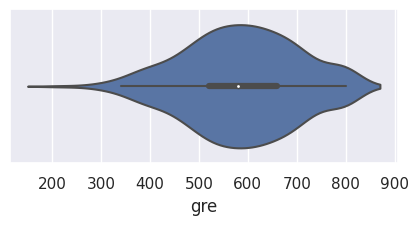

In [ ]:
sns.violinplot(data=df, x='gre')

<Axes: xlabel='admit', ylabel='gpa'>

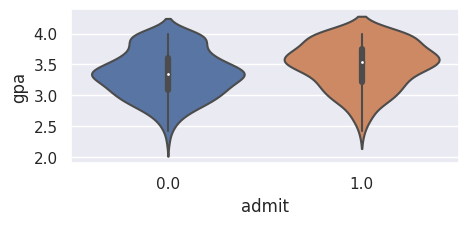

In [ ]:
## Your solution to Q3(2)
sns.violinplot(data=df, y='gpa', x='admit')

<Axes: xlabel='admit', ylabel='gpa'>

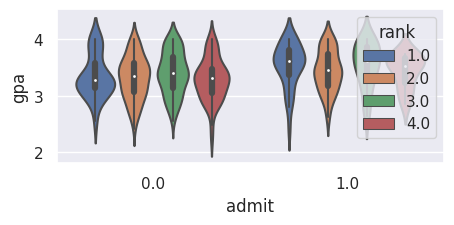

In [ ]:
## Your solution to Q3(3)
sns.violinplot(data=df, y='gpa', x='admit',hue='rank')

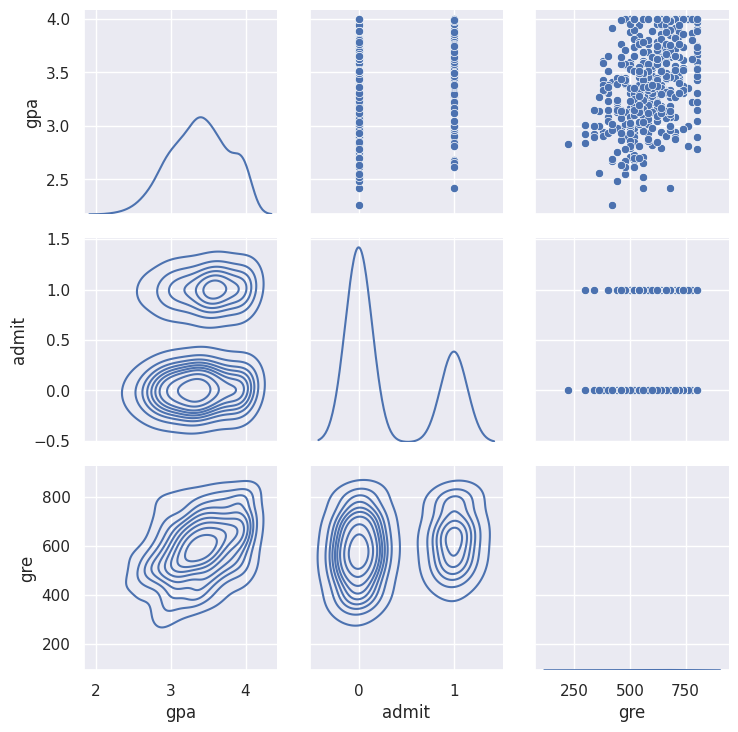

In [ ]:
## Your solution to Q3(4)
g = sns.PairGrid(df[['gpa', 'admit', 'gre']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
plt.show()
# but I cannot find obviously relationship through this method

<Axes: xlabel='gre', ylabel='gpa'>

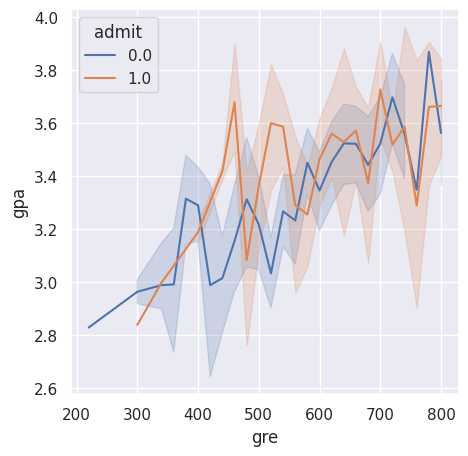

In [ ]:
## Your solution to Q3(4)
# I use line plot find the relation
sns.lineplot(data=df, y="gpa", x="gre", hue='admit')

## **Question 4 (10 points)**: Random Variables

Use functions under `scipy.stats` answer following questions.

- Define a random variable $X$ as a **poisson** random variable with `mu=1`.

- Compute $P(X < 2)$

- Compute `mean`, `median`, and `std` of $X$.

- Sample 10000 data under $X$, and show its histgram

- Find the smallest value of $a$ such that $P(X < a) > 0.9$

In [ ]:
## Your solution to Q4(1)
import numpy as np
import pandas as pd
from scipy.stats import t, beta, lognorm, expon, gamma, uniform, cauchy
from scipy.stats import gaussian_kde, poisson, binom, norm, chi2
from scipy.linalg import inv, sqrtm


In [ ]:
X = poisson(1)

In [ ]:
## Your solution to Q4(2)
print(X.cdf(2))

0.9196986029286058


In [ ]:
## Your solution to Q4(3)
print('mean of  X')
print(X.mean())
print('median of  X')
print(X.median())
print('std of  X')
print(X.std())

mean of  X
1.0
median of  X
1.0
std of  X
1.0


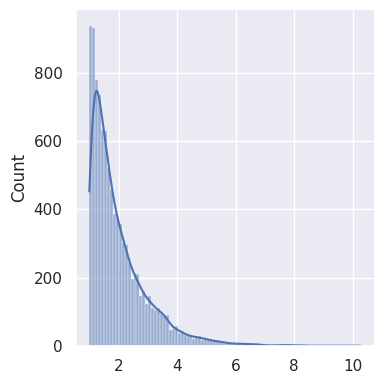

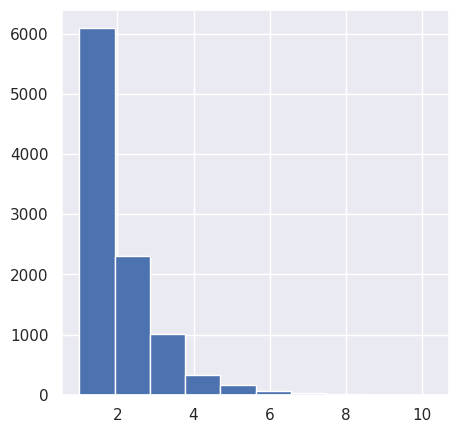

In [ ]:
## Your solution to Q4(4)
data = X.rvs(10000)
sns.displot(data, kde=True, height=4)
plt.show()
plt.hist(data)
plt.show()

In [ ]:
## Your solution to Q4(5)
print(X.ppf(0.9))

2.0


## **Question 5 (15 points)**: A/B Test

Use the same DataFrame `df` in **Q2**, answer following questions.

> Can we conclude at the 0.05 level of significance that the `gpa` of `admit=1` exceeds that of `admit=0`?

- What's the null and alternative hypothese?

- What's the test statistic used in the testing?

- Calculate the `test statistic` and `p-value` based on `scipy.stats`

- Interpret the p-value and drawn the conclusion.


In [ ]:
## Your solution to Q5(1)


H0 : gpa of admit=1(X1) is equal to that of admit=0(X0).(X0-X1=0)

H1 :gpa of admit=1 exceeds that of admit=0(claim).(X0-X1<0)

In [ ]:
## Your solution to Q5(2)

# we can  use t test because population is unknown.

In [ ]:
# T=(sample_mean1 - sample_mean2 - 0) / np.sqrt((std1**2)/400 +(std2**2)/400)
# n1 = n2
# degree of freedom = n1-1=n2-1=400-1=399
# X0-X1=0

$T = \frac{Y~0 - Y~1-(X~0-X~1)}{\sqrt{\frac{std~1^2+std~2^2}{n1} }} \sim t(399)$

In [ ]:
## Your solution to Q5(3)
from scipy.stats import t
Disbrition = t(399)
sm1 = 3.343700
sm2 = 3.489213
std1 = 0.377133
std2 = 0.37017
T=(sm1 - sm2 - 0) / np.sqrt((std1**2)/400 +(std2**2)/400)
print('test statistic :')
print(T)
print('p-value :')
print(Disbrition.cdf(T))

test statistic :
-5.5072045987643445
p-value :
3.271587876490229e-08


In [ ]:
## Your solution to Q5(4)

Yes, we can conclude.

Because according to t, the p_value='3.271587876490229e-08' is obviously less than 0.05,the test value falls into the reject region,we should reject the H0. Hence,there is enough evidence to support the alternative hypothesis(claim) that gpa of admit=1 exceeds that of admit=0(claim) at the significance level of α=0.05.

## **Question 6 (5 points)**: A/B Test (b)

This is a continued question of **Question 5**.

> Can we conclude at the 0.05 level of significance that the `gpa` of `admit=1` exceeds that of `admit=0` more than **0.05 point**?

- What's the null and alternative hypothese?

- What's the test statistic used in the testing?

- Calculate the `test statistic` and `p-value` based on `scipy.stats`

- Interpret the p-value and drawn the conclusion.

In [ ]:
## Your solution to Q6(1)

H0 : gpa of admit=1(X1) exceeds that of `admit=0`(X0) more than **0.05 point**.(X1-X0=0.05)

H1 :the `gpa` of `admit=1` exceeds that of `admit=0` more than **0.05 point**(X1-X0>0.05)

In [ ]:
## Your solution to Q6(2)
# we can  use t test because population is unknown.
# T=(sample_mean2 - sample_mean1 - 0.05) / np.sqrt((std1**2)/400 +(std2**2)/400)
# degree of freedom = n1-1=n2-1=400-1=399
# n1 = n2
# X1-X0 = 0.05

$T = \frac{Y~1 - Y~0-(X~1-X~0)}{\sqrt{\frac{std~1^2+std~2^2}{n1} }} \sim t(399)$

In [ ]:
## Your solution to Q6(3)
from scipy.stats import t
Disbrition = t(399)
sm1 = 3.343700
sm2 = 3.489213
std1 = 0.377133
std2 = 0.37017
T=(sm2 - sm1 - 0.05) / np.sqrt((std1**2)/400 +(std2**2)/400)
print('test statistic :')
print(T)
print('p-value :')
print(1-(Disbrition.cdf(T)))

test statistic :
3.6148635025171525
p-value :
0.00016948403535010925


In [ ]:
## Your solution to Q6(4)

Yes,we can conclude.

Because according to t, the p_value='0.00016948403535010925' is obviously less than 0.05,the test value falls into the reject region,we should reject the H0. Hence,there is enough evidence to support the alternative hypothesis(claim) that the `gpa` of `admit=1` exceeds that of `admit=0` more than **0.05 point**(X1-X0>0.05) at the significance level of α=0.05.

## **Question 7 (10 points)**: General questions (a)

If $Z_1, ..., Z_k$ are independent, standard normal random variables, then the sum of their squares,
$$
{\displaystyle Q\ =\sum _{i=1}^{k}Z_{i}^{2},}
$$
is distributed according to the **chi-squared distribution** (see [scipy doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)) with k degrees of freedom.

- Suppose $k=2$, generate 1000 samples under $Z_1$ and $Z_2$, respectively.

- Generate 1000 samples under $Q$ based on the samples of $Z_1$ and $Z_2$.

- Use the QQ-plot to verify the distribution of samples is **chi-squared distribution**.

In [ ]:
#Q1
from scipy.stats import gaussian_kde, poisson, binom, norm, chi2
Z1 = (norm(0,1)).rvs(1000)
Z2 = (norm(0,1)).rvs(1000)

In [ ]:
Q = (Z1**2) + (Z2**2)

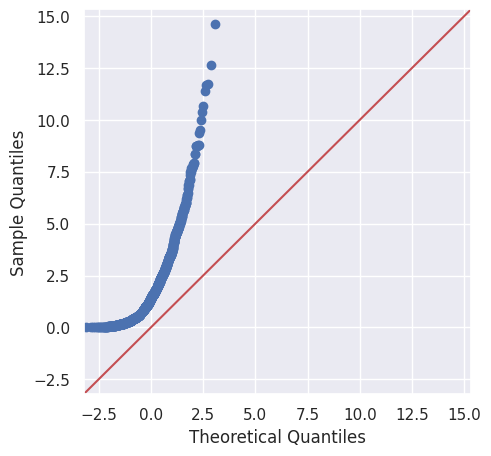

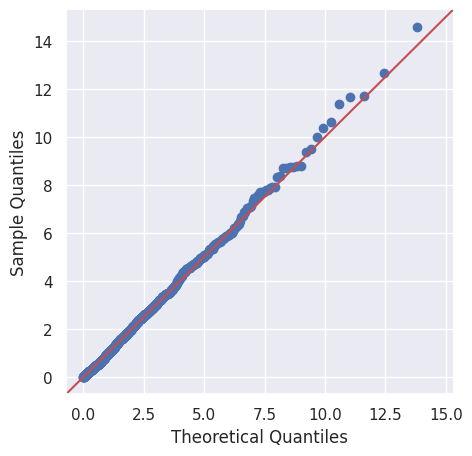

In [ ]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [5, 5]
sm.qqplot(data=Q, line='45')
plt.show()

sm.qqplot(data=Q, dist=chi2(2), line='45')
plt.show()

From the QQ plot, we can obviously see that the distribution of samples is **chi-squared distribution**

## **Question 8 (10 points)**: General questions (b)

Suppose $X \sim \text{Exp}(\lambda = 1)$ [wiki](https://en.wikipedia.org/wiki/Exponential_distribution) is a random variable following an exponential distribution distribution. Define $R = P(Z \leq X) = F_Z(X)$ where $F_Z$ is the cdf of an exponential distribution with $\lambda = 1$.

- Generate 1000 samples of $X$
- Generate 1000 samples of $R$ based on samples of $X$
- What's the distribution of $R$?
- Verify your conclusion by QQ-plot.

In [ ]:
## Your solution of Q8(1)
X = expon(loc=0,scale=1)
X.rvs(1000)

In [ ]:
## Your solution of Q8(2)
R = X.cdf(X.rvs(1000))

In [ ]:
## Your solution of Q8(3)
# it follows uniform distribution

\begin{equation}
F_U(u) = Pr(F_Y(Y) \le u) = Pr(Y \le F^{-1}_Y(u)) = F_Y(F^{-1}_Y(u)) = u
\end{equation}
$F_Z(.)$ is the **CDF function** of expon(loc=0,scale=1). Therefore, **when the distribution behind CDF and the distribution of Y are the same, the U statistics will always be uniformly distributed**.

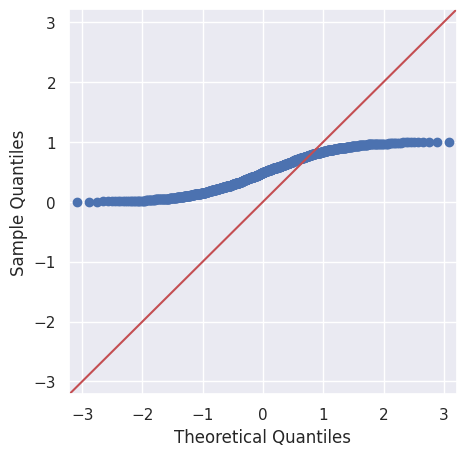

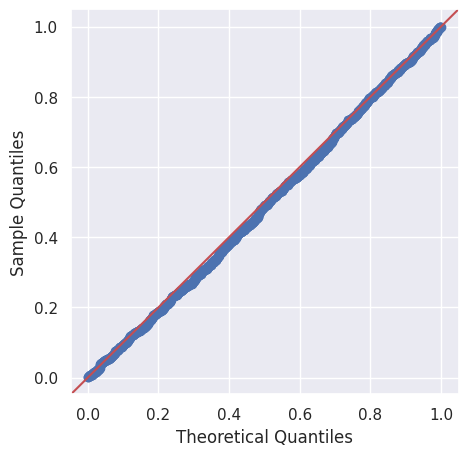

In [ ]:
## Your solution of Q8(4)
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [5, 5]
sm.qqplot(data=R, line='45')
plt.show()

sm.qqplot(data=R, dist=uniform(0,1), line='45')
plt.show()

From the last QQ plot, we can obviously see that the distribution of samples is **standard uniform distribution**